<a href="https://colab.research.google.com/github/Jacquedelest/Retail-Selling-2019/blob/master/Data_Visualization_of_a_Retail_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

Import and read dataset

In [3]:
retail = pd.read_csv('retail_raw_reduced.csv')
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


Create a new column `order_month` from column `order_date `with datetime format `'%Y-%m'`





In [4]:
retail['order_month'] = retail['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


Create a new column `gmv` from `item_price` multiplied by `quantity`

Gross Merchandise Volume (GMV) is a term used in online retailing to indicate a total sales monetary-value (e. g. in Dollars or Euros) for merchandise sold through a particular marketplace over a certain time frame.

In [5]:
retail['gmv'] = retail['item_price']*retail['quantity']
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


Show a multi-line chart of monthly gross merchandise volume in 2019 by brands

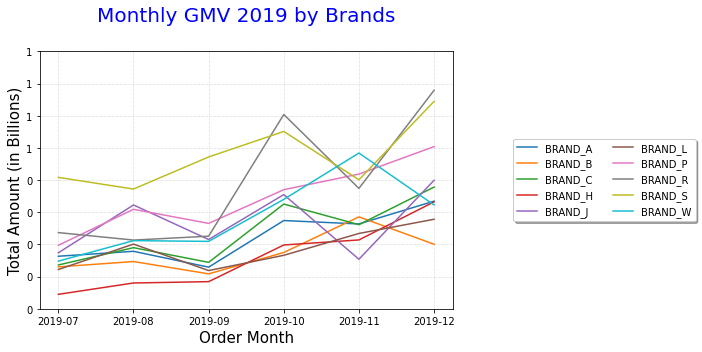

In [25]:
retail.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV 2019 by Brands', loc='center', pad=30,fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

Show a multi-line chart of monthly gross merchandise in 2019 by provinces

<Figure size 432x288 with 0 Axes>

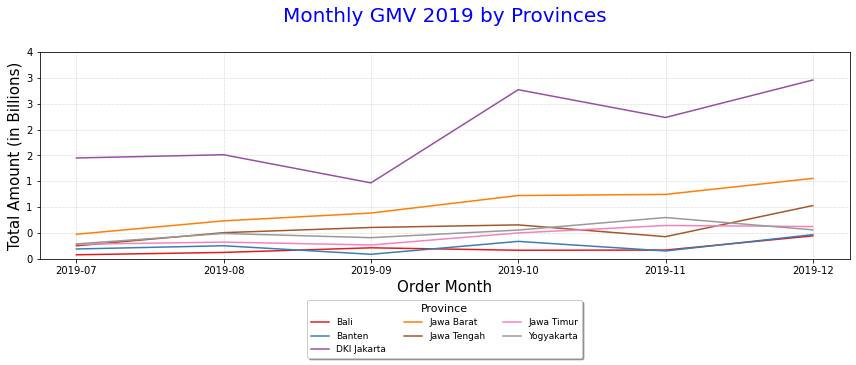

In [26]:
plt.clf()
retail.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV 2019 by Provinces', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(12,6)
plt.tight_layout()
plt.show()

Create a new variable of top five provices with total highest gross merchandise volume

In [8]:
top_provinces = (retail.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


Add a new column `province_top` into dataframe from variable `top_provinces`

In [9]:
retail['province_top'] = retail['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta


Create a multi-line chart of monthly gross merchandise in 2019 of top five provinces

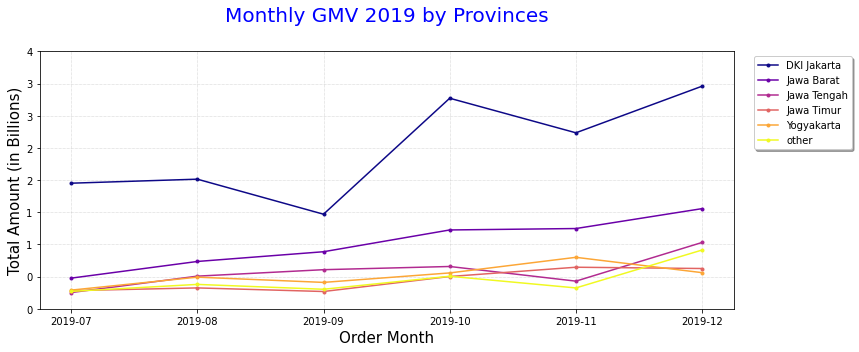

In [27]:
retail.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV 2019 by Provinces', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Add annotatio into a multi-line chart of monthly gross merchandise volume in 2019 of top five provinces

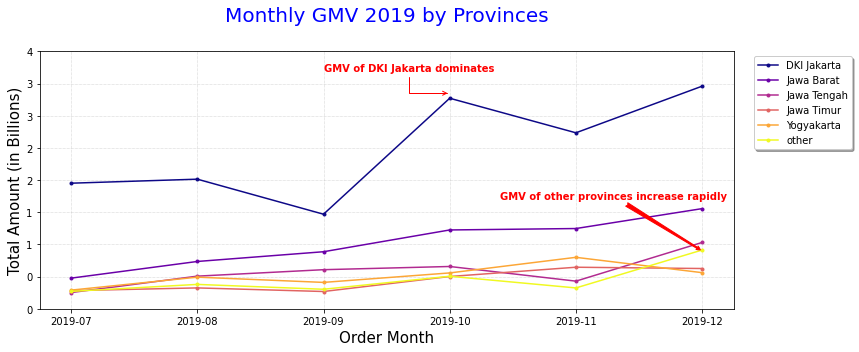

In [28]:
retail.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV 2019 by Provinces',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# first annotation 
plt.annotate('GMV of other provinces increase rapidly', xy=(5, 900000000), 
			xytext=(3.4, 1700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='fancy',
						   connectionstyle="arc3",
						   color='red'))

# second annotation
plt.annotate('GMV of DKI Jakarta dominates', xy=(3, 3350000000),
			xytext=(2, 3700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='->',
						   connectionstyle="angle",
						   color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Show transactional behavior of DKI Jakarta on October to December 2019

In [19]:
retail_dki_q4 = retail[(retail['province'] == 'DKI Jakarta') & (retail['order_month'] >= '2019-10')]
retail_dki_q4.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta


Create a piechart of gross merchandise volume distribution of each DKI Jakarta cities in fourth quarter 2019

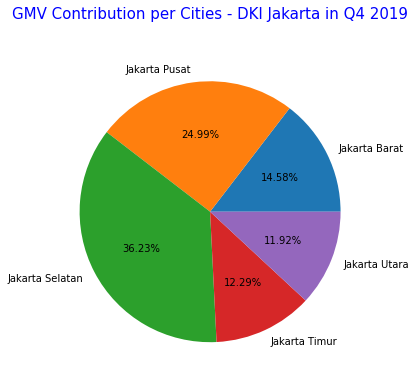

In [29]:
gmv_per_city_dki_q4 = retail_dki_q4.groupby('city')['gmv'].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution per Cities - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.show()

Create a barchart of total gross merchandise volume of each DKI Jakarta cities in fouth quarter 2019

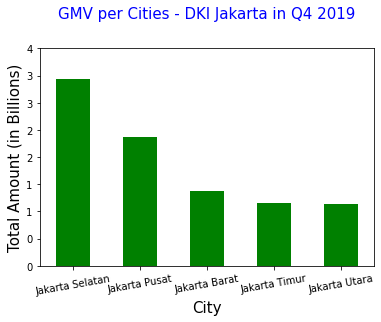

In [23]:
plt.clf()
retail_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV per Cities - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=10)
plt.show()

Create a barchart of gross merchandise volume of DKI Jakarta cities on October, November, and December 2019

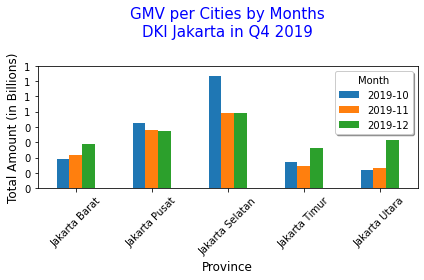

In [31]:
retail_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV per Cities by Months\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Create a stacked chart of gross merchandise volume of DKI Jakarta cities in fourth quarter 2019

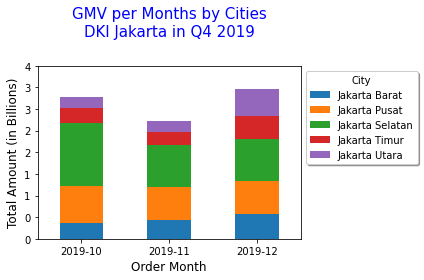

In [32]:
retail_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV per Months by Cities\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Inference**

From this stacked chart, we can see the pattern that most gross merchandise volume decreased from October to November, but then increased rapidly on December. For Jakarta Barat, the November gross merchandise volume actually increased from October. Meanwhile, in Jakarta Selatan, the December gross merchandise is actually smaller than the October one. Although, Jakarta Selatan is the biggest contributor to gross merchandise volume. 
That means we need to suggest the business team to increase selling in Jakarta Selatan, in order to increase the gross marchandise volume.

Create avariable of loyal customers from DKI Jakarta during fourth quarter 2019 by number of orders

In [33]:
retail_per_customer = (retail_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
retail_per_customer.sort_values(by='orders', ascending=False).head()

,customer_id,orders,quantity,gmv
0,12748,29,557,175286000
662,17841,26,270,144788000
207,14606,13,25,20714000
25,13089,8,166,93554000
462,16549,8,29,22714000


Show a histogram of order distribution per DKI Jakarta customers in foruth quarter 2019

<Figure size 432x288 with 0 Axes>

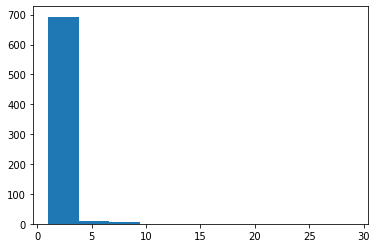

In [34]:
plt.clf()
#first histogram
plt.figure()
plt.hist(retail_per_customer['orders'])
plt.show()

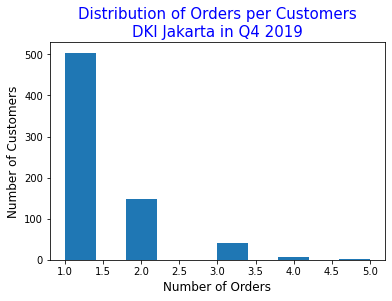

In [36]:
#second histogram, completed the first histogram
plt.figure()
plt.hist(retail_per_customer['orders'], range=(1,5))
plt.title('Distribution of Orders per Customers\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

Show a distributional histogram of DKI Jakarta customers' buying quantity in fourth quarter 2019

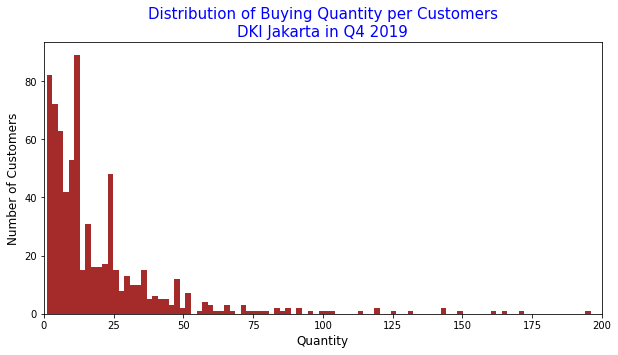

In [38]:
plt.figure(figsize=(10,5))
plt.hist(retail_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Buying Quantity per Customers\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200)
plt.show()

Show a distributional histogram of total gross merchandise volume per DKI Jakarta customers in fourth quarter 2019

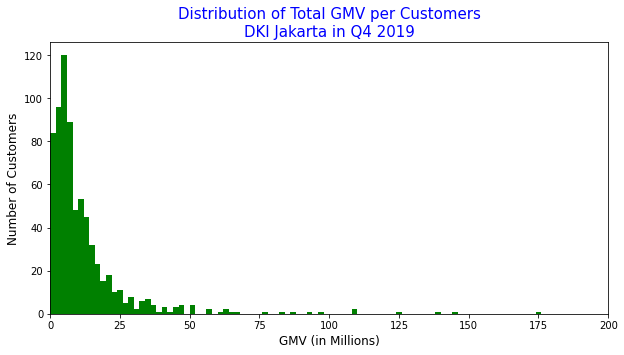

In [41]:
plt.figure(figsize=(10,5))
plt.hist(retail_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customers\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

Show a correlation of buying quantity and gross merchandise volume per DKI Jakarta customers in fourth quarter 2019 with scatterplot


<Figure size 432x288 with 0 Axes>

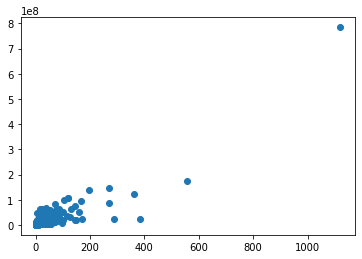

In [40]:
plt.clf()

#first scatterplot
plt.figure()
plt.scatter(retail_per_customer['quantity'], retail_per_customer['gmv'])
plt.show()

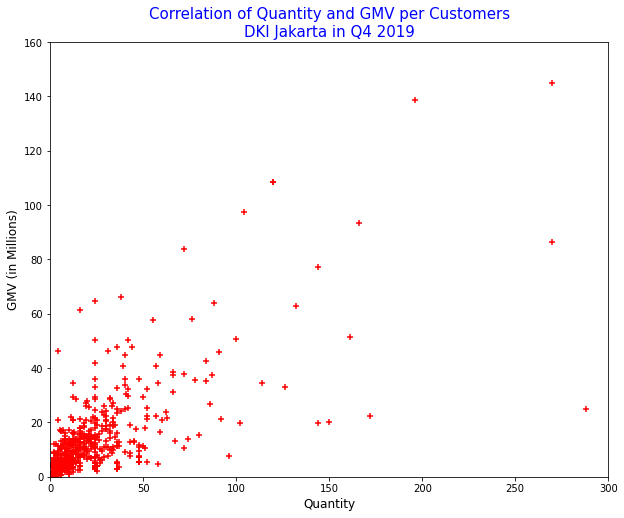

In [42]:
#second scatterplot, completed the first scatterplot
plt.figure(figsize=(10,8))
plt.scatter(retail_per_customer['quantity'], retail_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customers\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Show top sold five brands on December 2019

In [43]:
#show top five brands based on quantity
top_brands = (retail[retail['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#create a new dataframe, filter only on December 2019 and top five brands
retail_top5brand_dec = retail[(retail['order_month']=='2019-12') & (retail['brand'].isin(top_brands['brand'].to_list()))]

#print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


Create a muliti-line chart for number of daily sold top five brands

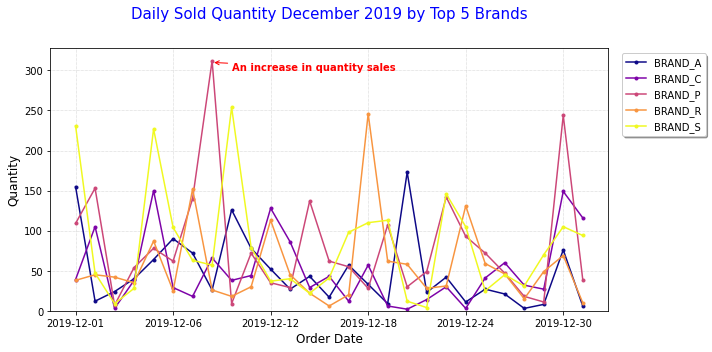

In [45]:
retail_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity December 2019 by Top 5 Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('An increase in quantity sales', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Show a barchart of top five brands with number of sold products on December 2019

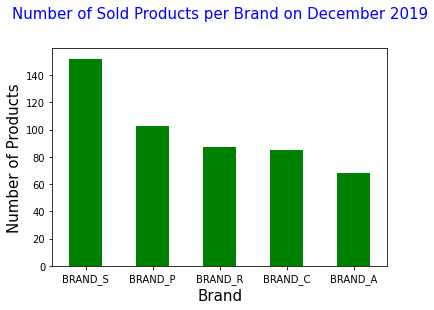

In [46]:
plt.clf()
retail_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand on December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Show a stacked barchart of top five brands with selling numbers of brands' products above 100 and below 100 on December 2019

In [48]:
#create a new dataframe for aggregating number of sold quantity per each products
retail_top5brand_dec_per_product = retail_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()


In [49]:
#add a new column for sold products >=100 and <100
retail_top5brand_dec_per_product['quantity_group'] = retail_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
retail_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

In [50]:
#create a brand sorting reference based on number of all products
s_sort = retail_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
s_sort

brand
BRAND_S    152
BRAND_P    103
BRAND_R     87
BRAND_C     85
BRAND_A     68
Name: product_id, dtype: int64

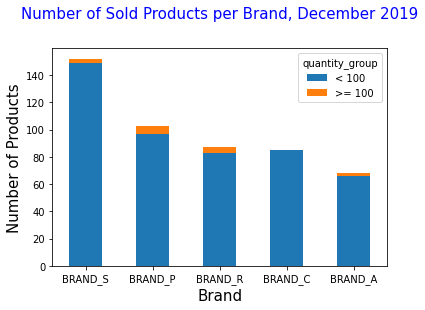

In [51]:
#plot stacked barchart
retail_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Show a distributional histogram of median price of top five brands per their products on December 2019

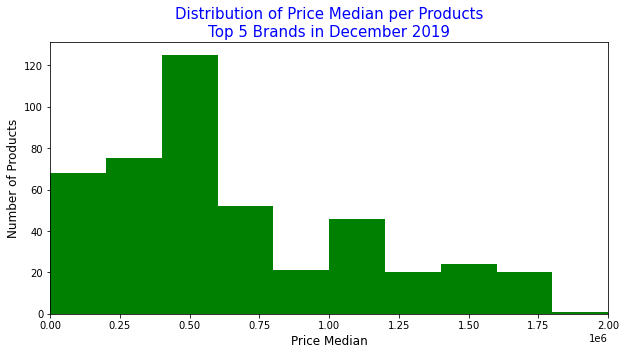

In [53]:
plt.figure(figsize=(10,5))
plt.hist(retail_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Products\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

Show a correlation between buying quantity and gross merchandise volume with scatterplot

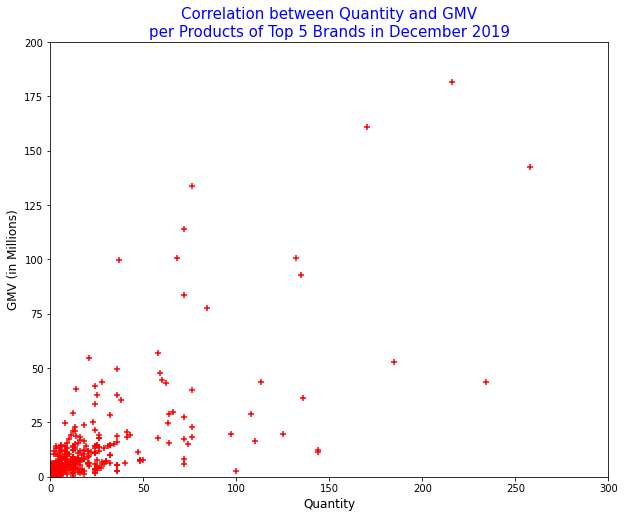

In [55]:
#aggregate per product
retail_per_product_top5brand_dec = retail_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(retail_per_product_top5brand_dec['quantity'],retail_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation between Quantity and GMV\nper Products of Top 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Show a correlaton between median price and quantity with scatterplot

<Figure size 432x288 with 0 Axes>

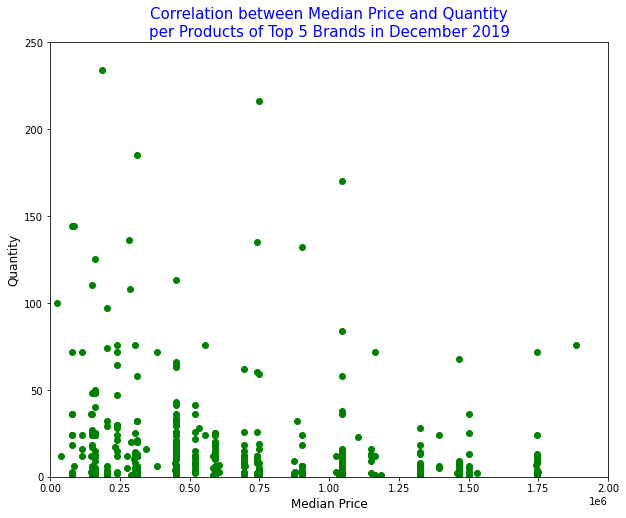

In [59]:
plt.clf()
#aggregate per product
retail_per_product_top5brand_dec = retail_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(retail_per_product_top5brand_dec['item_price'],retail_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation between Median Price and Quantity\nper Products of Top 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Median Price', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()